60000 train set
10000 test set


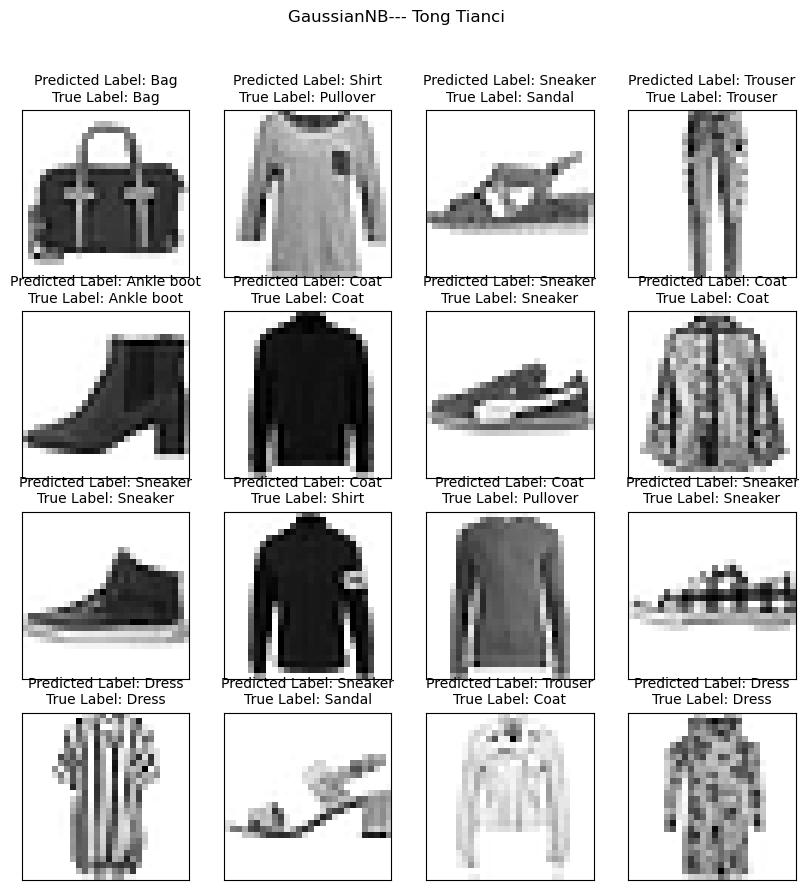

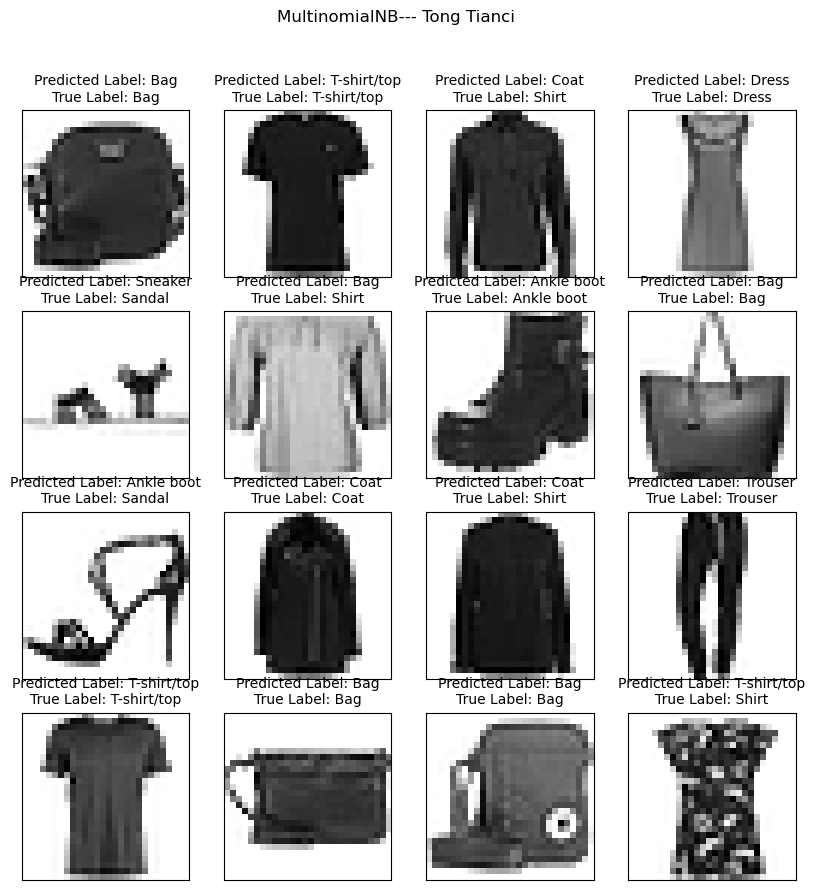

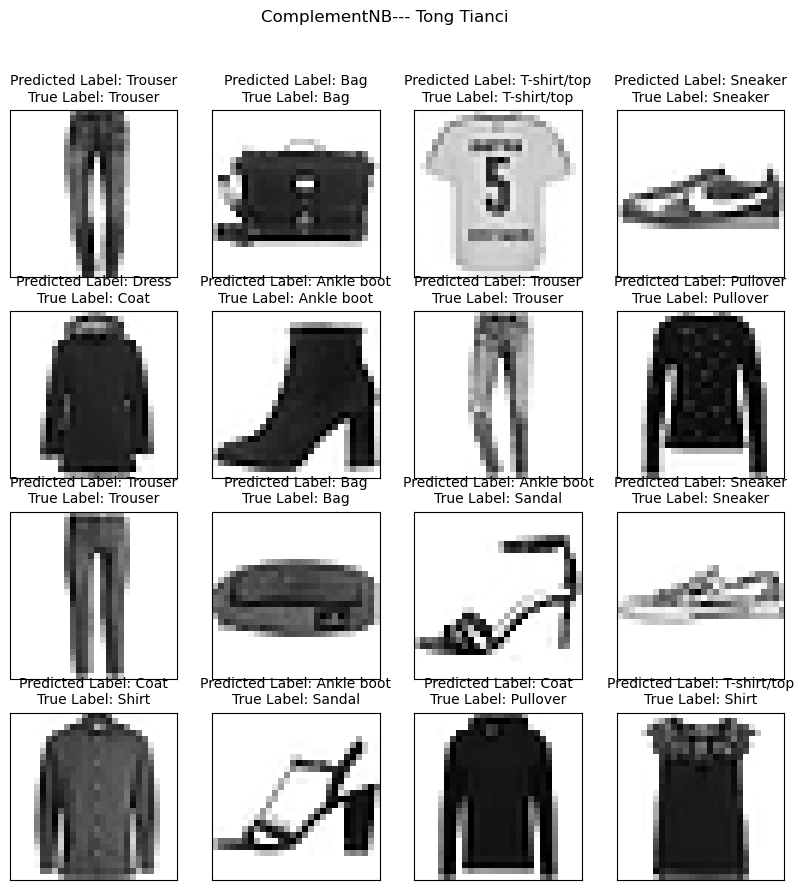

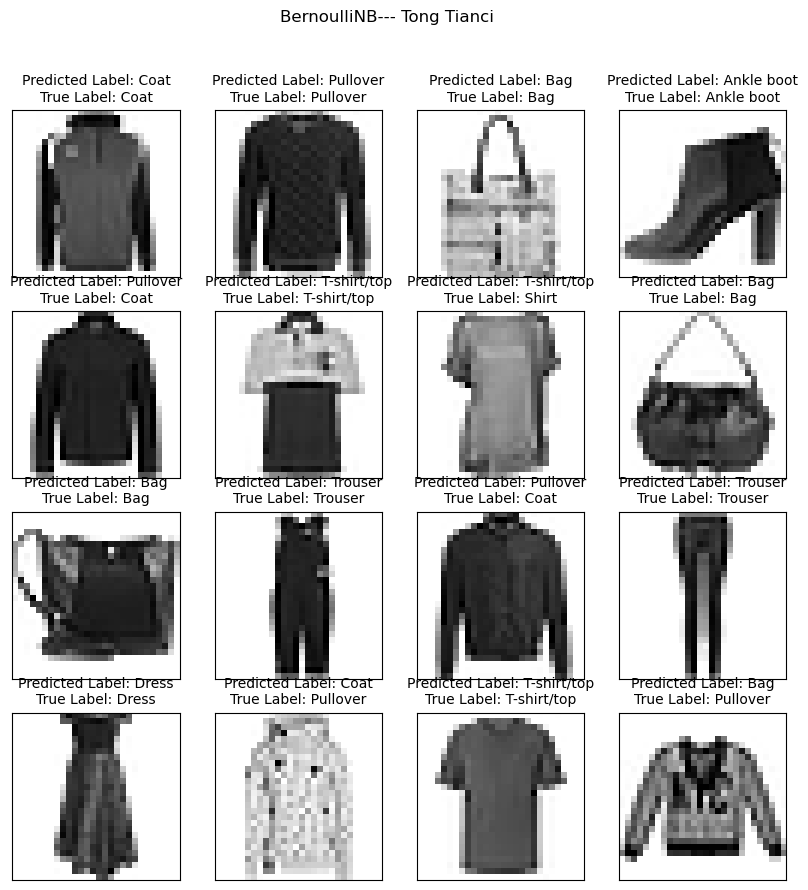

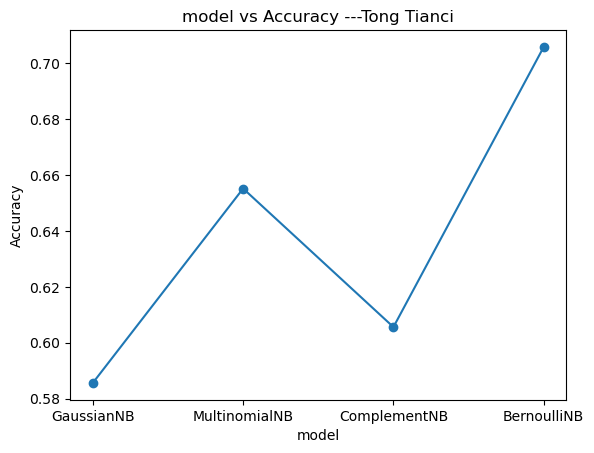

In [2]:
#首先，让我们下载fashion-mnist数据集，由于keras内置了该数据集，
#   所以这里就直接导入，不再通过kaggle平台下载。
import numpy as np
from sklearn.naive_bayes import MultinomialNB, GaussianNB,  ComplementNB, BernoulliNB
import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 加载数据集
fashion_mnist = tf.keras.datasets.fashion_mnist
(x, y), (x_test, y_test) = fashion_mnist.load_data()

# 定义英文标签
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# 打印训练集和测试数据集的数量
print(x.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# 规范化数据
# 对像素点 normalize，规范化数据维度使它们具有大致相同的比例
x = x / 255.0
x_test = x_test / 255.0
# 二维到一维
x = x.reshape(x.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

#可视化展示预测例子
def plot_prediction(x_test, y_test, z, text, index, num=10):
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(f"{text}"+u"--- Tong Tianci")
    if num > 16:
        num = 16
    random_indices = np.random.choice(range(len(x_test)), size=num, replace=False)
    j=1
    #展示数量，随机抽取
    for i in random_indices:
        ax = plt.subplot(4, 4, j)
        j=j+1
        #图片及标签
        ax.imshow(np.reshape(x_test[i], (28, 28)),
                  cmap=plt.cm.gray_r, interpolation='nearest')
        predicted_label = fashion_mnist_labels[z[i]]
        true_label = fashion_mnist_labels[y_test[i]]

        ax.set_title(f"Predicted Label: {predicted_label}\nTrue Label: {true_label}", fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()

#评估模型，并存放各模型的精确度，作为“模型对比可视化”纵轴值
Accuracy = []
#可视化横轴值
modelName = ["GaussianNB","MultinomialNB","ComplementNB","BernoulliNB"]

i=0
#首先定义了四种朴素贝叶斯模型
nb1 = GaussianNB()      #高斯分布朴素贝叶斯
nb2 = MultinomialNB()   #多项式朴素贝叶斯
nb3 = ComplementNB()    #补型朴素贝叶斯
nb4 = BernoulliNB()     #伯努利朴素贝叶斯
for model in [nb1,nb2,nb3,nb4]:
    #训练模型
    model.fit(x,y)
    #预测模型
    z = model.predict(x_test)
    #计算精确度
    Accuracy.append(accuracy_score(z,y_test))
    #可视化展示预测例子
    plot_prediction(x_test,y_test,z,modelName[i],10,16)
    i = i+1

#绘制各种朴素贝叶斯模型的对比图
plt.plot(modelName, Accuracy, marker='o')
plt.xlabel('model')
plt.ylabel('Accuracy')
plt.title(u'model vs Accuracy ---Tong Tianci')
plt.show()